- INSTALL LIBRARY YANG DIBUTUHKAN

untuk running hilangkan tanda #

In [41]:
#!pip3 install numpy

In [42]:
#!pip3 install pandas

IMPORT LIBRARY YANG DIGUNAKAN

In [43]:
import pandas as pd
import numpy as np

PEMANGGILAN DATASET

In [44]:
dataset = pd.read_csv('pert3.csv')

CROSCHECK DATASET 

- head() untuk menampilkan sejumlah dataset dari atas.
- tail() untuk menampilkan sejumlah dataset dari bawah.

In [45]:
print(dataset.head())

   transaction_id            timestamp  amount currency    merchant  \
0               1  2024-04-01 08:12:45    50.0      USD   Starbucks   
1               2  2024-04-01 12:30:18    25.0      USD     Walmart   
2               3  2024-04-02 14:55:37     NaN      USD      Amazon   
3               4  2024-04-03 09:20:04    75.0      USD     Netflix   
4               5  2024-04-03 13:45:22    20.0      USD  McDonald's   

          category  
0              NaN  
1        Groceries  
2  Online Shopping  
3              NaN  
4             Food  


MENAMPILKAN AMOUNT DAN CATEGORY

In [46]:
dataset.subset = dataset[['amount', 'category']]
print(dataset.subset)

   amount         category
0    50.0              NaN
1    25.0        Groceries
2     NaN  Online Shopping
3    75.0              NaN
4    20.0             Food
5    45.0         Shopping
6    60.0              Gas
7     NaN      Electronics
8    35.0           Coffee
9    50.0  Online Shopping


/tmp/ipykernel_11381/1182630959.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.subset = dataset[['amount', 'category']]


MENGISI NILAI AMOUNT YANG KOSONG DENGAN RATA-RATA

In [47]:
dataset.subset['amount'] = dataset.subset['amount'].fillna(dataset['amount'].mean())
print(dataset.subset)

   amount         category
0    50.0              NaN
1    25.0        Groceries
2    45.0  Online Shopping
3    75.0              NaN
4    20.0             Food
5    45.0         Shopping
6    60.0              Gas
7    45.0      Electronics
8    35.0           Coffee
9    50.0  Online Shopping


/tmp/ipykernel_11381/2947745103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.subset['amount'] = dataset.subset['amount'].fillna(dataset['amount'].mean())


MENGISI NILAI CATEGORY YANG KOSONG DENGAN 'KOSONG'

In [48]:
dataset.subset['category'] = dataset.subset['category'].fillna('kosong')
print(dataset.subset)

   amount         category
0    50.0           kosong
1    25.0        Groceries
2    45.0  Online Shopping
3    75.0           kosong
4    20.0             Food
5    45.0         Shopping
6    60.0              Gas
7    45.0      Electronics
8    35.0           Coffee
9    50.0  Online Shopping


/tmp/ipykernel_11381/753194494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.subset['category'] = dataset.subset['category'].fillna('kosong')


MENYIMPAN DATA CLEAN

- nomor baris (index) tidak akan disertakan dalam berkas csv

In [49]:
dataset.subset.to_csv('data_clean.csv', index=False)

IMPORT LIBRARY YANG DIGUNAKAN

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

PEMANGGILAN DATASET

In [51]:
dataset = pd.read_csv('data_clean.csv')

MENGELOMPOKKAN DATASET

- dataset.groupby('category') = mengelompokkan baris dalam dataset berdasarkan nilai unik dalam kolom ‘category’. Hasilnya adalah objek GroupBy, yang merupakan representasi data yang telah dikelompokkan.
- ['amount'].sum() = menghitung jumlah dari nilai ‘amount’ yang dipilih dalam setiap grup.


In [52]:
group = dataset.groupby('category')['amount'].sum()

MEMBUAT PIE CHART DARI DATASET

- plt.figure(figsize=(8,8)) = buat gambar dengan lebar 8 inci dan tinggi 8 inci.
- plt.axis('equal') = mengatur aspek rasio (rasio antara tinggi dan lebar) dari grafik dengan nilai sama.

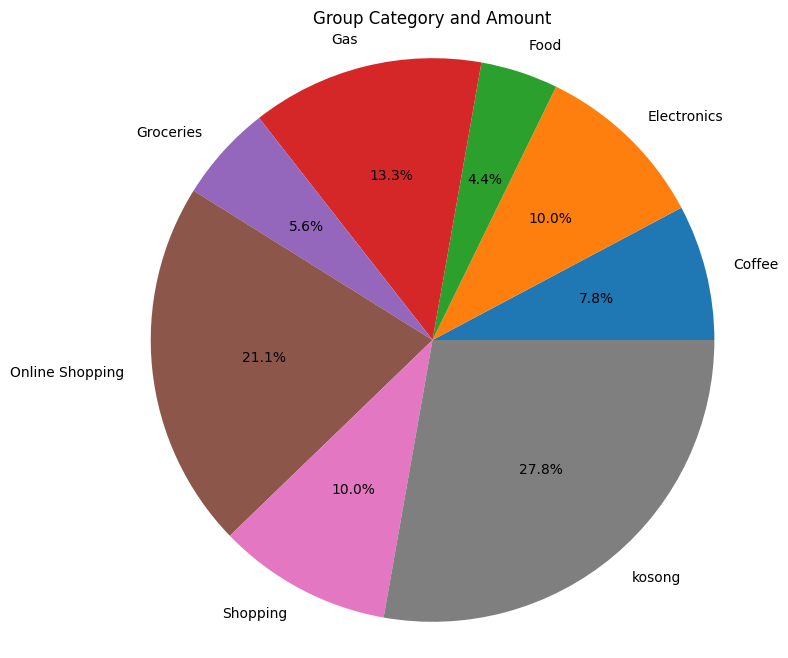

In [55]:
plt.figure(figsize=(8,8))
plt.pie(
    group,
    labels = group.index,
    autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title('Group Category and Amount')
plt.show()